You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

&nbsp;

&nbsp;

***
Help the fitness studio explore interest in workouts at a global and national level.

When was the global search for 'workout' at its peak? Save the year of peak interest as a string named year_str in the format "yyyy".

Of the keywords available, what was the most popular during the covid pandemic, and what is the most popular now? Save your answers as variables called peak_covid and current respectively.

What country has the highest interest for workouts among the following: United States, Australia, or Japan? Save your answer as top_country.

You'd be interested in expanding your virtual home workouts offering to either the Philippines or Malaysia. Which of the two countries has the highest interest in home workouts? Identify the country and save it as home_workout_geo.

In [43]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

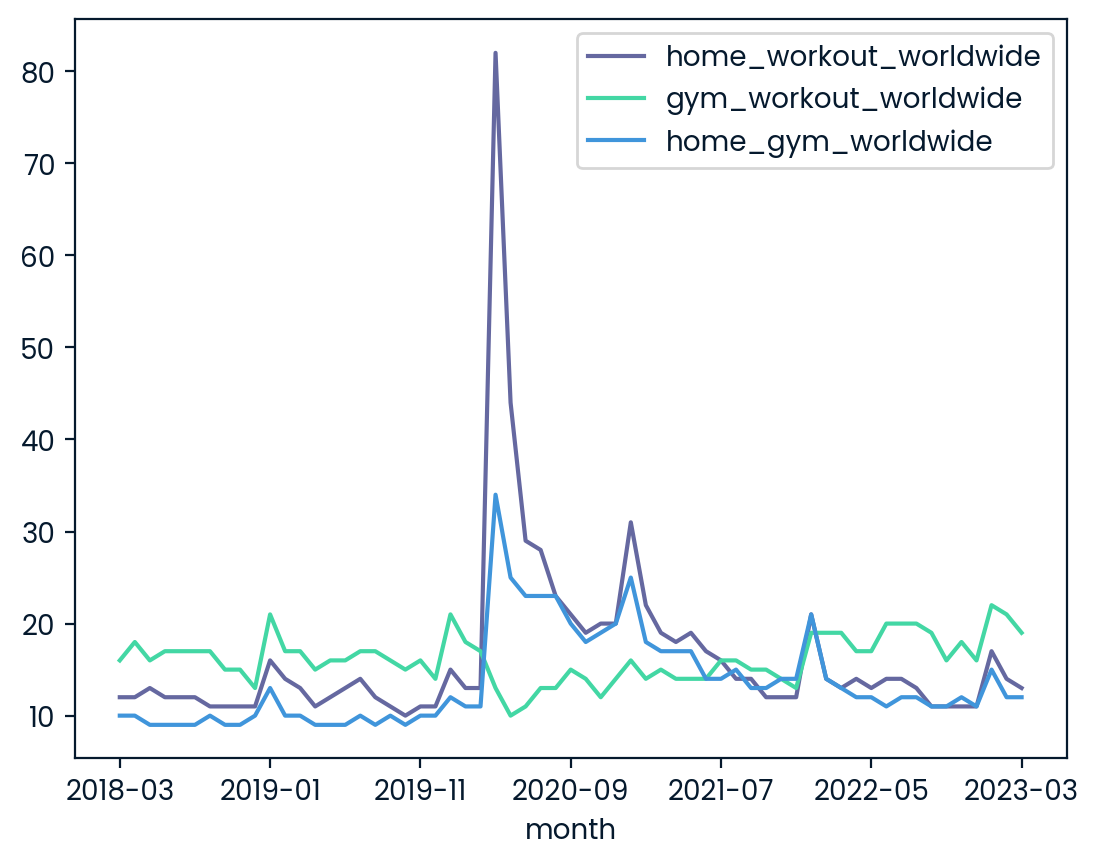

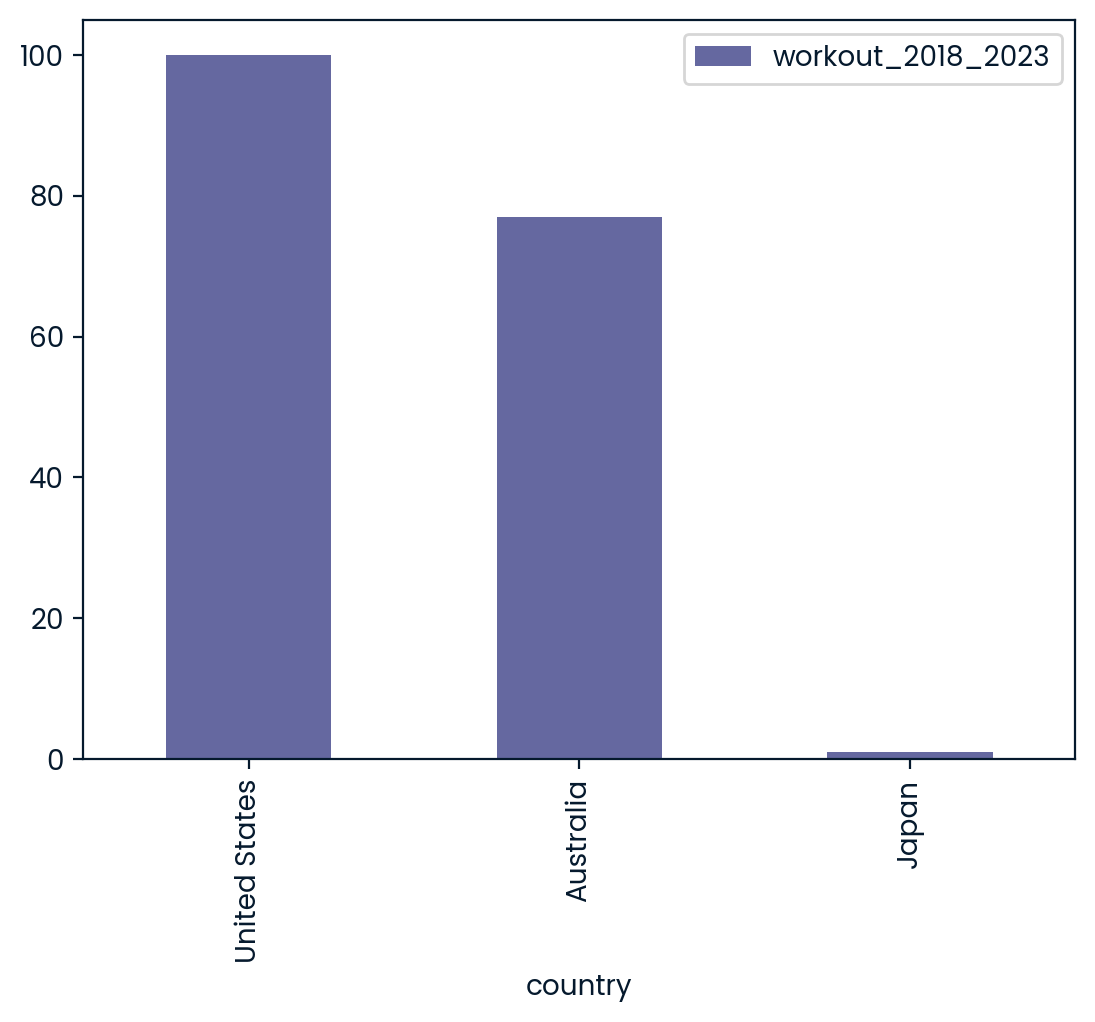

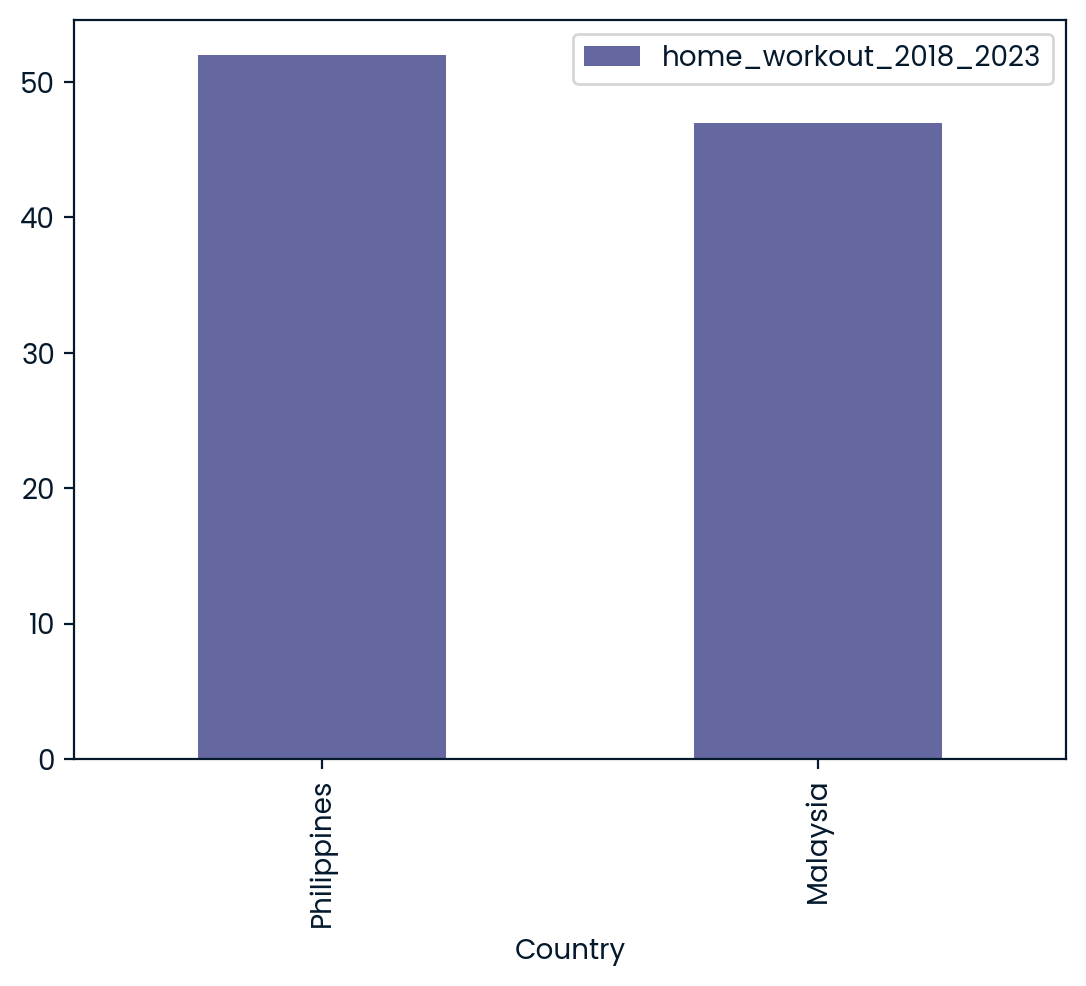

In [44]:
# Start coding here
df_wo = pd.read_csv("data/workout.csv")
df_kw = pd.read_csv("data/three_keywords.csv")
df_wo_g = pd.read_csv("data/workout_geo.csv")
df_kw_g = pd.read_csv("data/three_keywords_geo.csv")
# print(df_wo.head())
# print(df_kw)
# print(df_wo_g)
# print(df_kw_g)

# the year of peak interest
df_wo["year"]=pd.to_datetime(df_wo["month"]).dt.year
gr = df_wo.groupby("year").sum()
year_str = str(gr.index[gr["workout_worldwide"]==gr["workout_worldwide"].max()].tolist()[0])

# most popular keyword in covid, now? 
df_kw.plot(x="month")
peak_covid = "home_workout"
current = "gym_workout"

# highest interest for workouts: United States, Australia, Japan
row = df_wo_g[df_wo_g["country"].isin(["United States","Australia","Japan"])]
row.plot(x="country", y="workout_2018_2023", kind="bar")
top_country= "United States"

# home workouts, Philippines or Malaysia
r = df_kw_g[df_kw_g["Country"].isin(["Philippines", "Malaysia"])]
r["home"] = r["home_workout_2018_2023"]+r["home_gym_2018_2023"]
r.plot(x="Country", y="home_workout_2018_2023", kind="bar")
home_workout_geo = "Philippines"